In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [4]:
fname = 'ForRod_FBIExcel.csv'
df = pd.read_csv(fname)
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,4090,705,3243,142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan


In [5]:
df.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

In [6]:
df['Robbery_New'] = np.where(df['Robbery'] >0, 1,0)

In [7]:
df['Murmaider'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] >0, 1, 0)

In [8]:
df['Population_Dos'] = df['Population'] * df['Population'] 

In [9]:
df = df[df['Population_Dos'] < 8000000]

In [10]:
df = df[df['Population'] < 8000000]

In [11]:
x = df[['Robbery_New', 'Murmaider', 'Population_Dos', 'Population']]
y = df['Property\ncrime']

Coefficients: 
 [ 4.08256959e+01 -1.01007778e-09  8.66540703e-08  1.68103040e-02]
Intercept: 
 -7.472058081429278


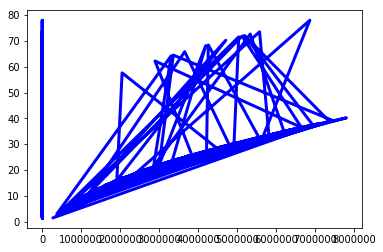

In [12]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs
# plt.scatter(x, y, color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
plt.show()

In [13]:
len(x) == len(y)

True

Coefficients: 
 [ 4.08256959e+01 -1.01007778e-09  8.66540703e-08  1.68103040e-02]
Intercept: 
 -7.472058081429278


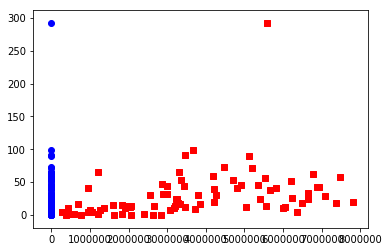

In [14]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs

#plt.plot(x, regr.predict(x), color='blue', linewidth=3)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(x['Population_Dos'], y, c = 'r', marker = 's')
ax1.scatter(x['Population'], y, c = 'b', marker = 'o')
plt.show()

# t = np.arange(0., 5., 0.2)
# plt.plot(t,t,r--', t, t**2, 'bs', t, t**3, 'g^')

Coefficients: 
 [ 4.08256959e+01 -1.01007778e-09  8.66540703e-08  1.68103040e-02]
Intercept: 
 -7.472058081429278


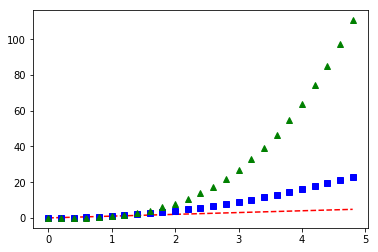

In [15]:
# Instantiate our model.
regr = linear_model.LinearRegression()

# Fit our model to our data.
regr.fit(x, y)

# Display the attributes we calculated.
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

# Plot outputs

#plt.plot(x, regr.predict(x), color='blue', linewidth=3)
t = np.arange(0., 5., 0.2)
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

In [16]:
x['Population']

0      1861
1      2577
6      1781
10     2053
12      658
13     2522
23     1410
25     1022
26     2325
27     2054
28     2065
29     2358
34     1174
37     1854
38     2219
42     2246
44      762
48      980
50     2732
51     1835
52     1733
58     2049
63     1827
75     1628
77     1122
79     2191
80     1913
87     1104
103    2265
105    2579
       ... 
231    2171
238    1385
242    1433
244    2116
251    2550
252    2460
256    1274
258    1602
260     997
265    2354
266     977
268    1947
270    2635
278    2279
280    2715
287     872
289    2362
292    2412
293    1351
295    1437
297    2450
299    1805
307    1691
316    1820
319     615
332    1862
335    1797
337    1732
339    2604
344     829
Name: Population, Length: 82, dtype: int64

In [17]:
t**3

array([0.00000e+00, 8.00000e-03, 6.40000e-02, 2.16000e-01, 5.12000e-01,
       1.00000e+00, 1.72800e+00, 2.74400e+00, 4.09600e+00, 5.83200e+00,
       8.00000e+00, 1.06480e+01, 1.38240e+01, 1.75760e+01, 2.19520e+01,
       2.70000e+01, 3.27680e+01, 3.93040e+01, 4.66560e+01, 5.48720e+01,
       6.40000e+01, 7.40880e+01, 8.51840e+01, 9.73360e+01, 1.10592e+02])

In [18]:
df.describe()

,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,Robbery_New,Murmaider,Population_Dos
count,82.000,82.000,82.000,0.000,82.000,82.000,82.000,82.000,82.000,82.000,82.000,64.000,82.000,82.000,82.000
mean,1821.000,1.720,0.000,nan,0.061,0.207,1.451,30.427,4.939,24.707,0.780,0.062,0.171,0.000,3659182.537
std,589.388,2.213,0.000,nan,0.287,0.515,2.091,37.564,6.799,31.128,1.432,0.244,0.379,0.000,2057025.293
min,526.000,0.000,0.000,nan,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,276676.000
25%,1414.500,0.000,0.000,nan,0.000,0.000,0.000,10.000,1.000,8.000,0.000,0.000,0.000,0.000,2000871.000
50%,1831.000,1.000,0.000,nan,0.000,0.000,1.000,19.500,3.000,14.500,0.000,0.000,0.000,0.000,3352577.000
75%,2321.500,3.000,0.000,nan,0.000,0.000,2.000,42.000,6.000,34.750,1.000,0.000,0.000,0.000,5389399.000
max,2794.000,12.000,0.000,nan,2.000,3.000,11.000,292.000,49.000,238.000,10.000,1.000,1.000,0.000,7806436.000


In [32]:
from sklearn import neighbors

# Run the same model, this time with weights.
knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
# X = pd.DataFrame(data = np.array(music.loudness, music.duration))
# Y = music.bpm

Y = pd.DataFrame(y)

knn_w.fit(x, Y)

Y_ = knn_w.predict(Y)

ValueError: query data dimension must match training data dimension

In [25]:
x.shape

(82, 4)

In [26]:
Y.shape

(82, 1)

In [29]:
np.array(y)

array([ 12,  24,  10,  39,   2,   5,  14,   4,  24,  20,  31,  13,  10,
        44,  46,  12,   2,   4,  58,  53,  32,  60,  16,  14,   8,  41,
        99,  66,  90,  33,  32,  16,   9,   5,  29,  26,  20,   1,  42,
        38,  10,  12,   2,  51,  46,   0,  13,  19,  15,   0,   8,   1,
        54,  10,  13,  73,  19,  12,   0,  31,   8,  57,  41,  30,  42,
        71,  18,   0, 292,  41,  15,   0,  10,  24,  47,  66,   0,  92,
        25,  44,  62,  17], dtype=int64)